<a href="https://colab.research.google.com/github/wojr21/courses/blob/main/data_science_bootcamp/13_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Image Recognition

Budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy popularny zbiór danych w dziedzinie sieci neuronowych: "Fashion-MNIST".

"Fashion-MNIST" to zestaw danych z obrazkami artykułów Zalando, składający się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28x28, powiązany z jedną etykietą z 10 klas.

0 - T-shirt/top

1 - Trousers

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

### Import bibliotek

In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision = 12, suppress = True, linewidth = 150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.3.0'

### Załadowanie danych i wstępna eksploracja

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

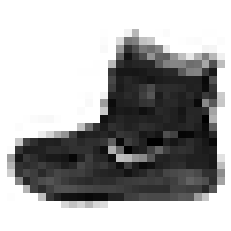

In [6]:
plt.imshow(X_train[0], cmap = 'gray_r')
plt.axis('off')

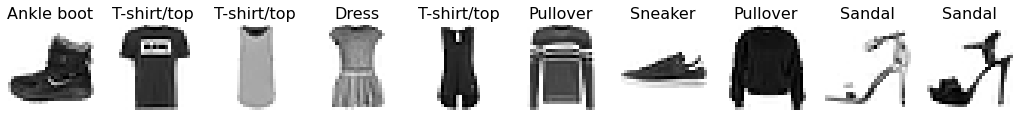

In [7]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize = (18, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap = 'gray_r')
  plt.title(class_names[y_train[i-1]], color = 'black', fontsize = 16)
plt.show()

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)


### Budowa modelu

In [11]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32,
                    validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5235 - accuracy: 0.8137 - val_loss: 0.4232 - val_accuracy: 0.8520
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3857 - accuracy: 0.8620 - val_loss: 0.3929 - val_accuracy: 0.8624
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3517 - accuracy: 0.8745 - val_loss: 0.4002 - val_accuracy: 0.8566
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3300 - accuracy: 0.8820 - val_loss: 0.4036 - val_accuracy: 0.8586
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3151 - accuracy: 0.8890 - val_loss: 0.3576 - val_accuracy: 0.8792
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3056 - accuracy: 0.8917 - val_loss: 0.3726 - val_accuracy: 0.8773
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2967 - accuracy: 0.8964 - val_loss: 0.3736 - val_accuracy:

In [13]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.523453,0.813667,0.423200,0.852000,0
1,0.385677,0.861958,0.392943,0.862417,1
2,0.351717,0.874458,0.400211,0.856583,2
3,0.329960,0.882042,0.403625,0.858583,3
4,0.315130,0.888958,0.357561,0.879250,4
5,0.305600,0.891688,0.372553,0.877333,5
6,0.296684,0.896375,0.373576,0.876833,6
7,0.287570,0.899188,0.369459,0.885250,7
8,0.280935,0.902167,0.388212,0.886250,8
9,0.275561,0.903562,0.382016,0.880917,9


### Ocena modelu

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 2)
fig.add_trace(go.Scatter(x = metrics['epoch'], y = metrics['accuracy'],
                         name = 'accuracy'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = metrics['epoch'], y = metrics['loss'],
                         name = 'loss'), row = 1, col = 2)
fig.add_trace(go.Scatter(x = metrics['epoch'], y = metrics['val_accuracy'],
                         name = 'val_accuracy'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = metrics['epoch'], y = metrics['val_loss'],
                         name = 'val_loss'), row = 1, col = 2)

fig.update_xaxes(title_text = 'epochs')
fig.update_yaxes(col = 1, title_text = 'accuracy')
fig.update_yaxes(col = 2, title_text = 'loss')
fig.update_layout(width = 1000, title = 'Accuracy and Loss')
fig.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose = 0)
print(test_acc)

0.8743000030517578


### Predykcja na podstawie modelu:
*   **model.evaluate(y_true, y_pred)** - pozwala obliczyć metryki modelu
*   **model.predict_classes()** - pozwala zwrócić przewidziane klasy
*   **model.predict_proba(), model_predict()** - pozwala zwrócić prawdopodobieństwo danej klasy



In [18]:
predictions = model.predict(X_test)
predictions

array([[0.000000041437, 0.            , 0.000000000126, ..., 0.0022236     , 0.000006512907, 0.99745506    ],
       [0.000002523628, 0.            , 0.9979443     , ..., 0.000000000003, 0.000000079684, 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.00014846209 , 0.            , 0.000020157182, ..., 0.000000000182, 0.9997757     , 0.            ],
       [0.000000000003, 0.9999999     , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.000000300195, 0.000000001294, 0.000000117177, ..., 0.0009962003  , 0.0003112182  , 0.000004960123]], dtype=float32)

In [19]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000315,0.000000,0.002224,0.000007,0.997455
1,0.000003,0.000000,0.997944,0.000000,0.001411,0.000015,0.000627,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.562238,0.000000,0.002149,0.000096,0.000208,0.000000,0.434633,0.000000,0.000676,0.000000


In [20]:
predictions_cls = model.predict_classes(X_test)
predictions_cls

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5])

### Eksploracja predykcji

In [30]:
#@title Wybierz indeks zdjęcia:
idx = 2500 #@param {type:"slider", min:0, max:10000, step:1}

if predictions_cls[idx] == y_test[idx]:
  color = 'green'
else:
  color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x = class_names, y = predictions_df.iloc[idx],
                     orientation = 'v', marker_color = color))
fig.update_layout(width = 600, height = 300,
                  title = f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width = 200)

### Błędnie sklasyfikowane obrazy

In [41]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
  if predictions_cls[idx] != y_test[idx]:
    misclassified.append(idx)

index_mapper = {}

for idx, idx_real in enumerate(misclassified):
  index_mapper[idx] = idx_real

idx = 121 #@param {type:"slider", min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x = class_names,
                     y = predictions_df.iloc[index_mapper[idx]],
                     orientation = 'v',
                     marker_color = 'red'))
fig.update_layout(width = 600, height = 300,
                  title = f'Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                  f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}')
fig.show()

from PIL import Image, ImageOps

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width = 200)

### Kilka możliwości poprawy modeli:

*   zwiększenie liczby iteracji (epok)
*   zwiększenie/zmniejszenie parametrów uczenia, zmiana wartości hiperparametrów
*   zwiększenie/zmniejszenie liczby neuronów wewnątrz warstw ukrytych
*   zwiększenie/zmniejszenie parametru batch_size, czyli rozmiaru wsadu
*   zwiększenie/zmniejszenie liczby warstw ukrytych
*   zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout

